# Dados

#### gender	
> genero
#### race/ethnicity	
> etnia
#### parental level of education	
> nível de escolaridade dos pais
1. alguma faculdade
2. grau de associado 
3. ensino médio 
4. algum colégio 
5. licenciatura 
6. mestrado

#### lunch	
#### test preparation course
> curso preparatório para testes	
#### math score	
> matematica pontos
#### reading score
> leitura pontos	
#### writing score
> escritura pontos

In [107]:
import copy 
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [108]:
data = pd.read_csv(r'dataset/StudentsPerformance.csv',sep=',')

# Verificar dados

In [109]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [110]:
data['race/ethnicity'].value_counts().reset_index()

,race/ethnicity,count
0,group C,319
1,group D,262
2,group B,190
3,group E,140
4,group A,89


In [111]:
data['parental level of education'].value_counts().reset_index()

,parental level of education,count
0,some college,226
1,associate's degree,222
2,high school,196
3,some high school,179
4,bachelor's degree,118
5,master's degree,59


In [112]:
data['lunch'].value_counts().reset_index()

,lunch,count
0,standard,645
1,free/reduced,355


In [113]:
data['test preparation course'].value_counts().reset_index()

,test preparation course,count
0,none,642
1,completed,358


# Analise

/home/mateus/MEGA/Projetos/DesempenhoNaEscola/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


/home/mateus/MEGA/Projetos/DesempenhoNaEscola/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


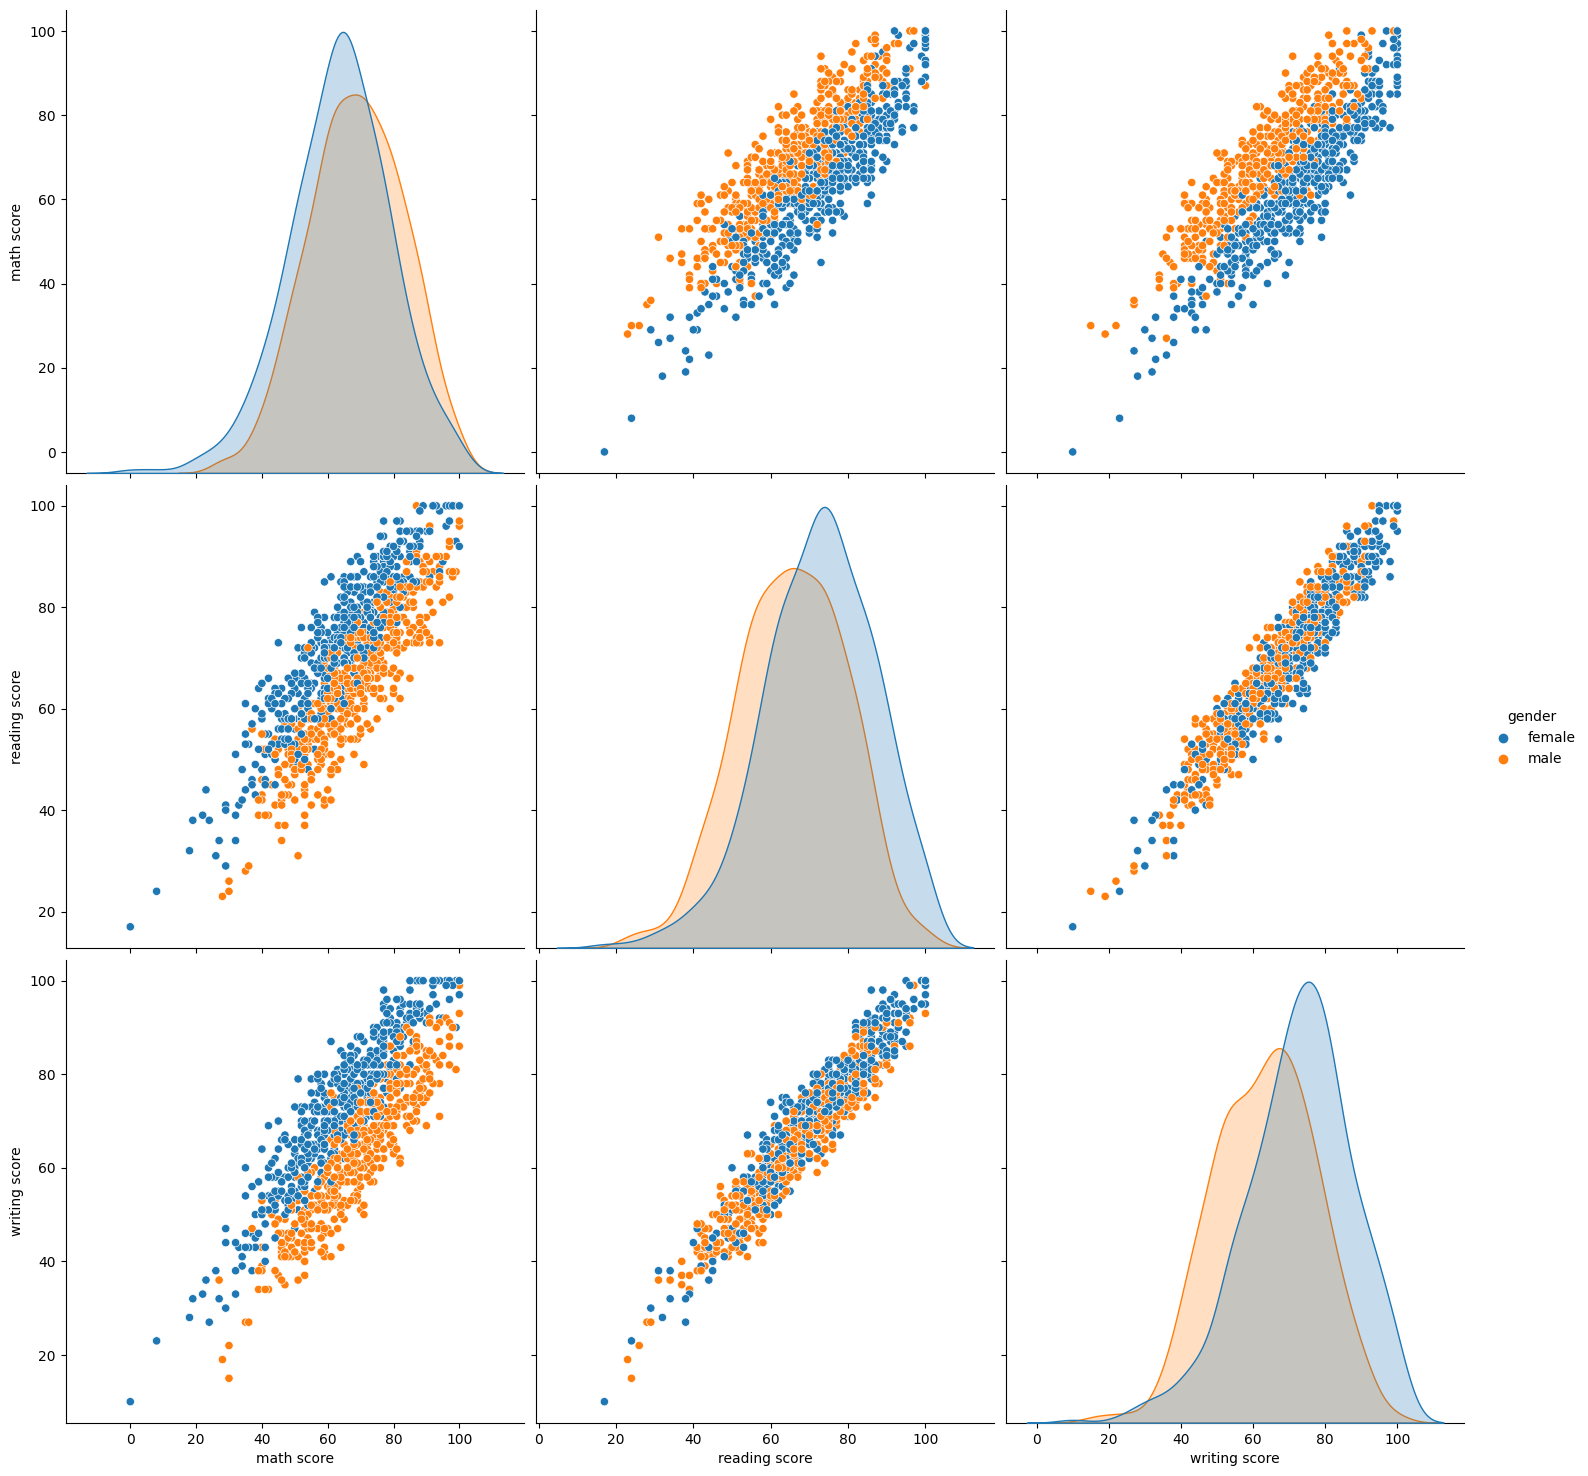

In [114]:
sea.pairplot( data ,hue='gender',size=5)

/home/mateus/MEGA/Projetos/DesempenhoNaEscola/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


/home/mateus/MEGA/Projetos/DesempenhoNaEscola/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


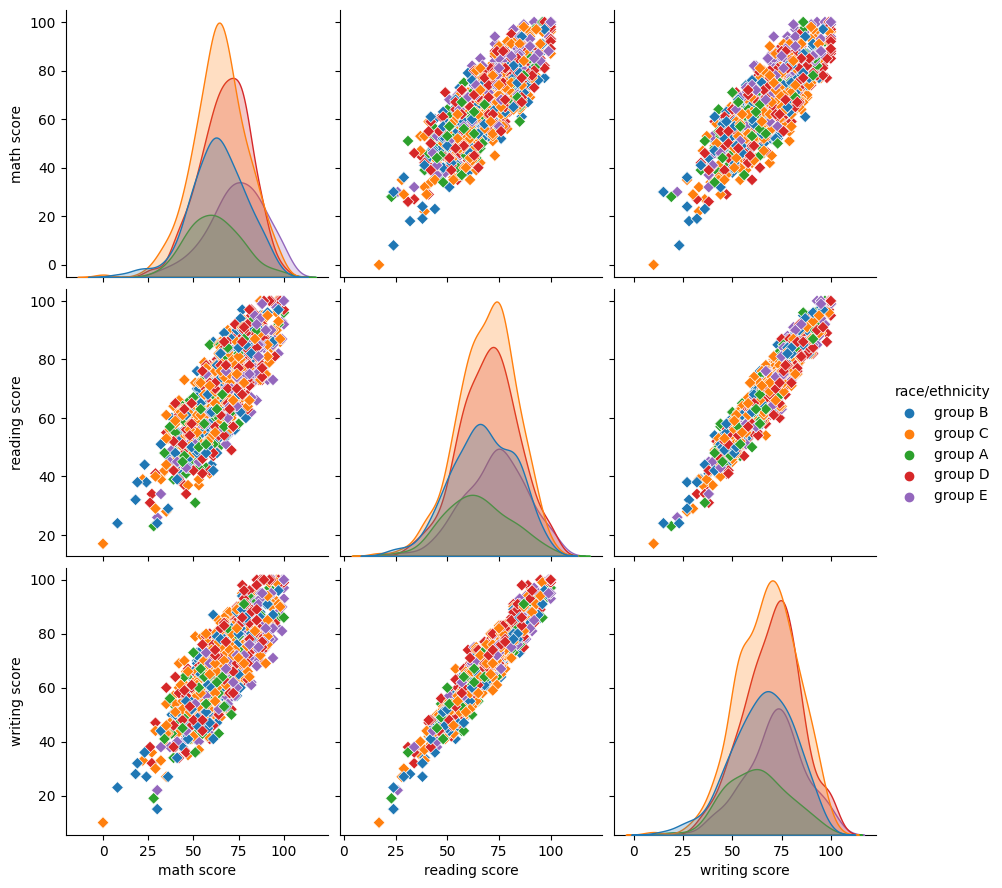

In [115]:
sea.pairplot(data,hue='race/ethnicity',markers="D",size=3)

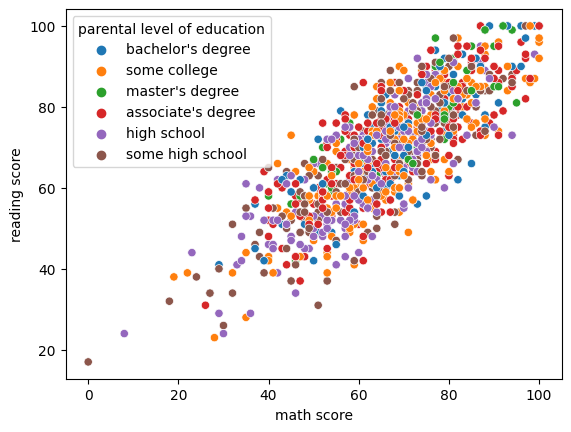

In [116]:
sea.scatterplot(
    x = data['math score'],
    y = data['reading score'],
    hue=data['parental level of education'],
    markers="D"
    )
plt.show()

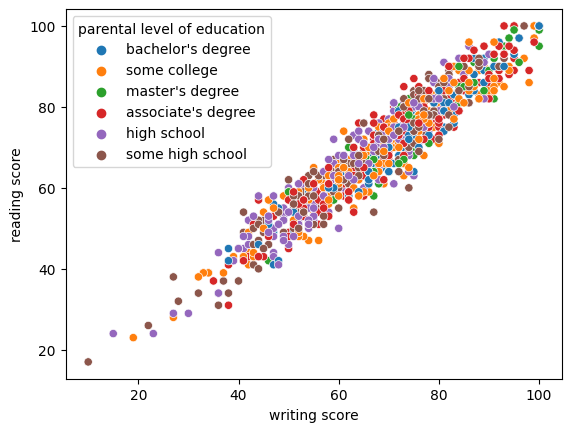

In [117]:
sea.scatterplot(
    x = data['writing score'],
    y = data['reading score'],
    hue=data['parental level of education'],
    markers="D"
    )
plt.show()

# Classificação

In [155]:
from sklearn.metrics         import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import LabelEncoder,LabelBinarizer
from sklearn.multiclass      import OneVsOneClassifier,OneVsRestClassifier
from sklearn.naive_bayes     import GaussianNB,BernoulliNB
from sklearn.linear_model    import LogisticRegression
from sklearn.tree            import DecisionTreeClassifier
from sklearn.svm             import SVC,LinearSVC,SVR

In [119]:
ClassGenero = LabelBinarizer()
ClassLunch  = LabelBinarizer()
ClassTest   = LabelBinarizer()

In [120]:
data['gender'] = ClassGenero.fit_transform(data['gender'])

In [121]:
data['lunch'] = ClassLunch.fit_transform(data['lunch'])

In [122]:
data['test preparation course'] = ClassTest.fit_transform(data['test preparation course'])

In [123]:
ClassEtnia     = LabelEncoder()
ClassEducation = LabelEncoder()

In [124]:
data['race/ethnicity'] = ClassEtnia.fit_transform(data['race/ethnicity'])

In [125]:
data['parental level of education'] = ClassEducation.fit_transform(data['parental level of education'])

## Correlação

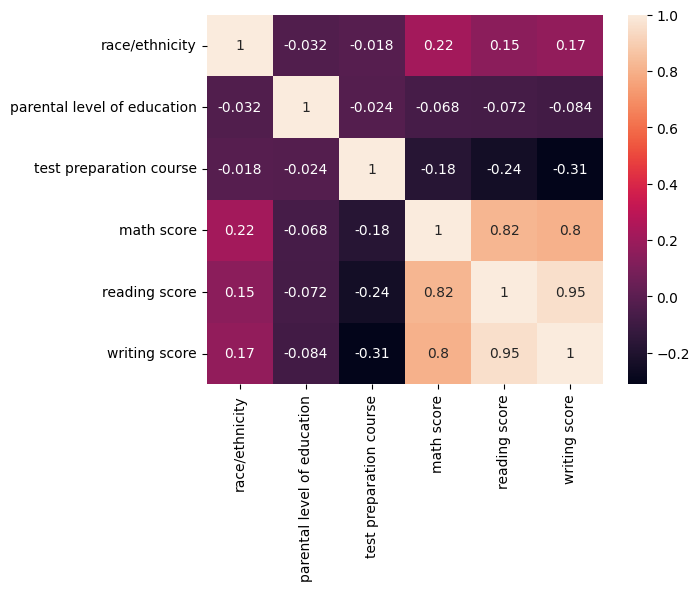

In [126]:
sea.heatmap(data.drop(columns=['gender','lunch']).corr(),annot=True)
plt.show()

### Get dummies

In [127]:
dataset1 = copy.deepcopy(data)

In [128]:
dataEducation = pd.get_dummies(
    data['parental level of education'],
    prefix ='parental level of education',
    dtype  = int
    )

In [129]:
dataEtnia = pd.get_dummies(
    data['race/ethnicity'],
    prefix = 'race/ethnicity',
    dtype  = int
)

In [130]:
concatEducation = pd.concat(
    [dataset1,dataEducation],
    axis=1
)
concatEtnia = pd.concat(
    [concatEducation,dataEtnia],
    axis=1
)

In [131]:
dataset1 =  copy.deepcopy(concatEtnia)

In [133]:
dataset1.drop(columns=['parental level of education','race/ethnicity'],inplace=True)

In [134]:
dataset1.head(3)

,gender,lunch,test preparation course,math score,reading score,writing score,parental level of education_0,parental level of education_1,parental level of education_2,parental level of education_3,parental level of education_4,parental level of education_5,race/ethnicity_0,race/ethnicity_1,race/ethnicity_2,race/ethnicity_3,race/ethnicity_4
0,0,1,1,72,72,74,0,1,0,0,0,0,0,1,0,0,0
1,0,1,0,69,90,88,0,0,0,0,1,0,0,0,1,0,0
2,0,1,1,90,95,93,0,0,0,1,0,0,0,1,0,0,0


### Classificando genero

In [135]:
X = data.drop(columns='gender')
Y = data['gender']

In [136]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.3)

### Regressão logistica

In [137]:
LogisticRegre = LogisticRegression()

In [138]:
fitsLR = LogisticRegre.fit(x_train,y_train)

In [140]:
y_predLR =fitsLR.predict(x_test)

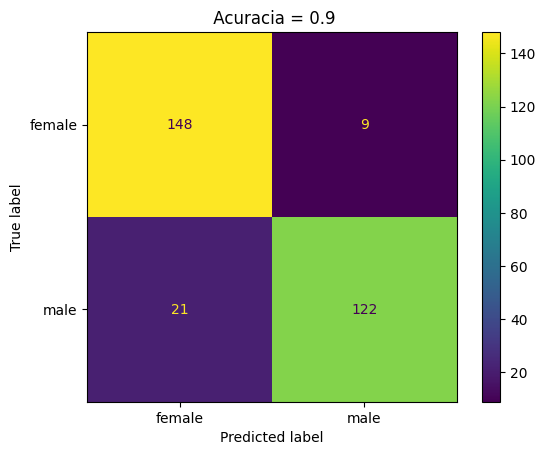

In [147]:
ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(y_test,y_predLR),
    display_labels   = ClassGenero.classes_
).plot()
plt.title(f' Acuracia = {accuracy_score(y_test,y_predLR)}')
plt.show()

### Gaussian

In [149]:
Gaussian = GaussianNB()

In [151]:
fitG = Gaussian.fit(x_train,y_train)

In [153]:
y_predG = fitG.predict(x_test)

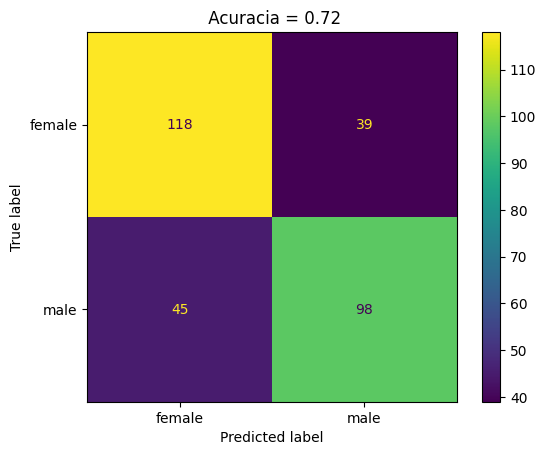

In [154]:
ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(y_test,y_predG),
    display_labels   = ClassGenero.classes_
).plot()
plt.title(f' Acuracia = {accuracy_score(y_test,y_predG)}')
plt.show()

### OneVsOneClassifier

In [157]:
OneVsOne = OneVsOneClassifier(LinearSVC())

In [158]:
fitOVO  = OneVsOne.fit(x_train,y_train)

/home/mateus/MEGA/Projetos/DesempenhoNaEscola/venv/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/mateus/MEGA/Projetos/DesempenhoNaEscola/venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
